# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading the Music data

In [2]:
music = pd.read_csv('music_dataset_mod.csv')
music.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


### Data Exploration And Preprocessing

In [3]:
df =music.copy()

In [4]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [6]:
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

<Axes: xlabel='Genre', ylabel='count'>

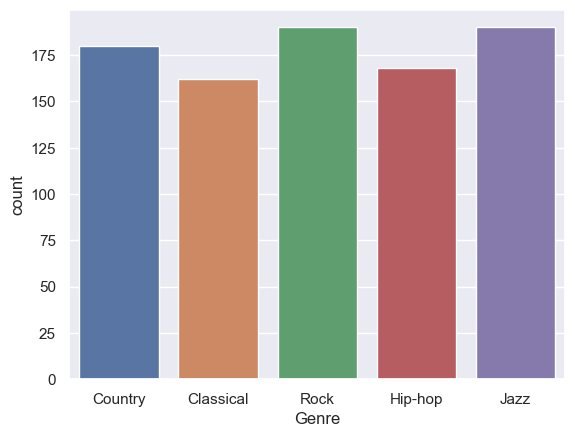

In [7]:
sns.countplot(x='Genre',data=df)

In [8]:
df2 = df.dropna(subset=['Genre']).copy()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        890 non-null    float64
 1   Dynamics Range               890 non-null    float64
 2   Vocal Presence               890 non-null    float64
 3   Percussion Strength          890 non-null    float64
 4   String Instrument Detection  890 non-null    float64
 5   Electronic Element Presence  890 non-null    float64
 6   Rhythm Complexity            890 non-null    float64
 7   Drums Influence              890 non-null    float64
 8   Distorted Guitar             890 non-null    float64
 9   Metal Frequencies            890 non-null    float64
 10  Ambient Sound Influence      890 non-null    float64
 11  Instrumental Overlaps        890 non-null    float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obje

### Encoding Catagorical values

In [10]:
label_encoder = LabelEncoder()

In [11]:
df2['Genre_encoded'] = label_encoder.fit_transform(df2['Genre'])

In [12]:
new = df2.assign(Genre=df2['Genre_encoded']).drop(columns=['Genre_encoded'])


In [13]:
new.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


### correlation Analysis

In [14]:
correlation_matrix = new.corr()


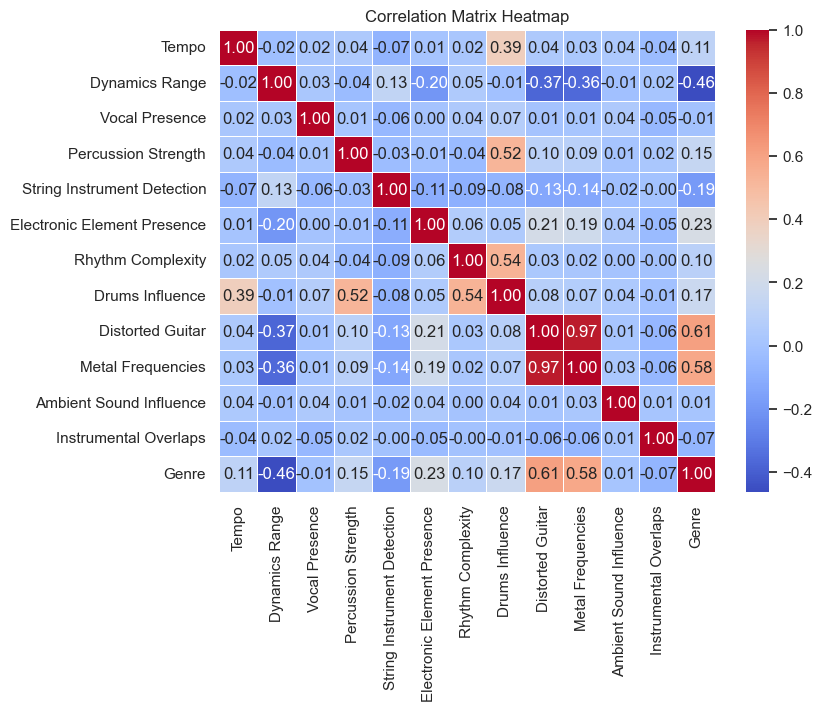

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
X = new.drop(columns='Genre')
y = new['Genre']

In [17]:
X

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986
...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517


In [18]:
y

0      1
1      0
2      4
3      2
4      1
      ..
973    2
996    0
997    4
998    4
999    3
Name: Genre, Length: 890, dtype: int32

### standardizing the data and applying PCA

In [19]:
scaler =StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(X)

In [21]:
pca =PCA(n_components=None)

In [22]:
X_pca = pca.fit_transform(X_scaled)

In [23]:
explained_variance_ratio=pca.explained_variance_ratio_


In [24]:

pca.components_.shape

(12, 12)

In [25]:
pca.explained_variance_

array([2.4102767 , 1.80957004, 1.12556853, 1.04480272, 1.0254787 ,
       0.9811879 , 0.95486541, 0.91464461, 0.84097149, 0.7203538 ,
       0.15224814, 0.03353028])

In [26]:
cumulative_explained_variance=explained_variance_ratio.cumsum()

In [27]:
explained_variance_ratio

array([0.20063071, 0.15062807, 0.09369199, 0.08696907, 0.08536054,
       0.08167379, 0.07948271, 0.07613474, 0.07000221, 0.05996203,
       0.01267309, 0.00279105])

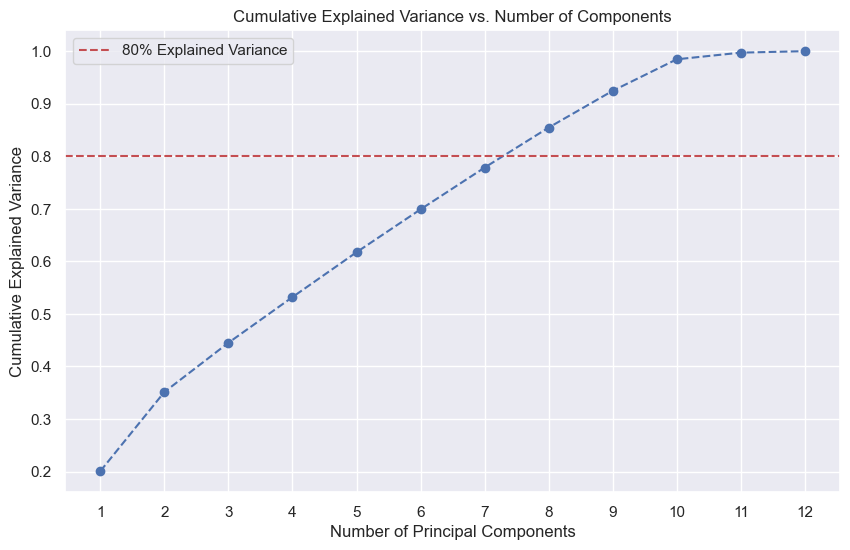

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend(loc='best')
plt.show()

### Applying PCA By spacifying components 

In [29]:
pca2 =PCA(n_components=8)


In [30]:
X_pca2 = pca2.fit_transform(X_scaled)

In [31]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca2, y, test_size=0.3, random_state=42)

### Training the model on PCA Data Calculating the accurecy Score

In [32]:
model_1 = LogisticRegression(max_iter=100000,random_state=42)

In [33]:
model_1.fit(X_train_pca, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [34]:
y_pred_pca = model_1.predict(X_test_pca)


In [35]:
accuracy = accuracy_score(y_test, y_pred_pca)

In [36]:
accuracy

0.5355805243445693

### Training the model on original Data Calculating the accurecy Score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model_2 = LogisticRegression(max_iter=100000,random_state=42)

In [39]:
model_2.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [40]:
y_pred_original = model_2.predict(X_test)

In [41]:
 accuracy2= accuracy_score(y_test, y_pred_original)

In [42]:
 accuracy2

0.5280898876404494

### Assigning Genre to the Missing value

In [43]:
missing_genre_rows = music[music['Genre'].isnull()]


In [44]:
missing_genre_rows

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [45]:
missing_genre_features = missing_genre_rows.drop(columns=['Genre'])


In [46]:
missing_genre_features

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


In [47]:
missing_genre_scaled = scaler.fit_transform(missing_genre_features)

In [48]:
missing_genre_pca = pca2.fit_transform(missing_genre_scaled)

In [49]:
predicted_genres = model_1.predict(missing_genre_pca)

In [50]:
predicted_genres


array([0, 2, 1, 4, 4, 1, 1, 4, 4, 1, 4, 2, 4, 4, 1, 0, 4, 1, 1, 3, 3, 3,
       3, 4, 2, 4, 3, 1, 0, 4, 0, 1, 3, 4, 4, 2, 3, 0, 1, 1, 1, 3, 3, 4,
       4, 1, 3, 0, 0, 1, 1, 4, 3, 2, 4, 1, 1, 4, 3, 4, 1, 0, 0, 3, 2, 4,
       2, 0, 1, 4, 1, 2, 4, 4, 0, 2, 4, 2, 2, 0, 4, 0, 4, 0, 0, 2, 0, 1,
       3, 3, 0, 4, 4, 3, 3, 4, 3, 2, 0, 4, 0, 1, 2, 4, 4, 3, 4, 2, 3, 0])

In [51]:

decoded_genres = label_encoder.inverse_transform(predicted_genres)

In [52]:
decoded_genres

array(['Classical', 'Hip-hop', 'Country', 'Rock', 'Rock', 'Country',
       'Country', 'Rock', 'Rock', 'Country', 'Rock', 'Hip-hop', 'Rock',
       'Rock', 'Country', 'Classical', 'Rock', 'Country', 'Country',
       'Jazz', 'Jazz', 'Jazz', 'Jazz', 'Rock', 'Hip-hop', 'Rock', 'Jazz',
       'Country', 'Classical', 'Rock', 'Classical', 'Country', 'Jazz',
       'Rock', 'Rock', 'Hip-hop', 'Jazz', 'Classical', 'Country',
       'Country', 'Country', 'Jazz', 'Jazz', 'Rock', 'Rock', 'Country',
       'Jazz', 'Classical', 'Classical', 'Country', 'Country', 'Rock',
       'Jazz', 'Hip-hop', 'Rock', 'Country', 'Country', 'Rock', 'Jazz',
       'Rock', 'Country', 'Classical', 'Classical', 'Jazz', 'Hip-hop',
       'Rock', 'Hip-hop', 'Classical', 'Country', 'Rock', 'Country',
       'Hip-hop', 'Rock', 'Rock', 'Classical', 'Hip-hop', 'Rock',
       'Hip-hop', 'Hip-hop', 'Classical', 'Rock', 'Classical', 'Rock',
       'Classical', 'Classical', 'Hip-hop', 'Classical', 'Country',
       'Jazz', 'Jaz

In [53]:
music.loc[music['Genre'].isnull(), 'Genre'] = decoded_genres

In [54]:
music['Genre'].isnull().sum()

0

In [55]:
report_original = classification_report(y_test, y_pred_original, target_names=label_encoder.classes_, output_dict=True)

In [56]:
report_original

{'Classical': {'precision': 0.8596491228070176,
  'recall': 0.9607843137254902,
  'f1-score': 0.9074074074074074,
  'support': 51.0},
 'Country': {'precision': 0.34146341463414637,
  'recall': 0.2692307692307692,
  'f1-score': 0.3010752688172043,
  'support': 52.0},
 'Hip-hop': {'precision': 0.4489795918367347,
  'recall': 0.4583333333333333,
  'f1-score': 0.45360824742268036,
  'support': 48.0},
 'Jazz': {'precision': 0.42857142857142855,
  'recall': 0.3870967741935484,
  'f1-score': 0.4067796610169491,
  'support': 62.0},
 'Rock': {'precision': 0.5,
  'recall': 0.5925925925925926,
  'f1-score': 0.5423728813559322,
  'support': 54.0},
 'accuracy': 0.5280898876404494,
 'macro avg': {'precision': 0.5157327115698654,
  'recall': 0.5336075566151467,
  'f1-score': 0.5222486932040347,
  'support': 267.0},
 'weighted avg': {'precision': 0.5120623663060874,
  'recall': 0.5280898876404494,
  'f1-score': 0.5176605326173493,
  'support': 267.0}}

In [57]:
precision_original = report_original['Hip-hop']['precision']

In [58]:
precision_original

0.4489795918367347

In [59]:
report_pca = classification_report(y_test, y_pred_pca, target_names=label_encoder.classes_, output_dict=True)


In [60]:
precision_pca = report_pca['Hip-hop']['precision']

In [61]:
precision_pca

0.4883720930232558

In [62]:
precision_difference = precision_pca - precision_original

In [63]:
precision_difference

0.0393925011865211

### Predicting Music Genre from Track number

In [64]:
track_992_features = music.loc[992, 'Genre']

In [65]:
track_992_features

'Rock'